# II. Programming and critical analysis

Recall the column_diagnosis.arff dataset from previous homeworks. For the following exercises,
normalize the data using sklearn’s MinMaxScaler

In [1]:
from scipy.io.arff import loadarff
import pandas as pd


# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])

true_labels = df['class'].str.decode('utf-8')
df = df.drop(columns=['class'])

In [2]:
# Normalize the data using sklearn’s MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

true_labels_int = label_encoder.fit_transform(true_labels)

## 1)
Using sklearn, apply k-means clustering fully unsupervisedly on the normalized data with 𝑘 ∈ {2,3,4,5} (random=0 and remaining parameters as default). Assess the silhouette and purity of the produced solutions.

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
import numpy as np

def purity_score(y_true, y_pred):
    # compute contingency/confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

silhouette_scores = []
purity_scores = []

k_values = [2, 3, 4, 5]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(normalized_data)
    
    silhouette_avg = silhouette_score(normalized_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    purity = purity_score(true_labels_int, cluster_labels)
    purity_scores.append(purity)

for k, silhouette, purity in zip(k_values, silhouette_scores, purity_scores):
    print(f'K={k}: \nSilhouette Score: {silhouette}\nPurity: {purity}\n\n')

/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=2: 
Silhouette Score: 0.36044124340441114
Purity: 0.632258064516129


K=3: 
Silhouette Score: 0.29579055730002257
Purity: 0.667741935483871


K=4: 
Silhouette Score: 0.27442402122340176
Purity: 0.6612903225806451


K=5: 
Silhouette Score: 0.23823928397844843
Purity: 0.6774193548387096




/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 2)
Consider the application of PCA after the data normalization:  
    i. Identify the variability explained by the top two principal components.  
    ii. For each one of these two components, sort the input variables by relevance by inspecting the absolute weights of the linear projection.

In [9]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_data)

explained_variance = pca.explained_variance_ratio_
variance_explained_by_top_two = np.sum(explained_variance[:2])
print(f"Variability explained by the top two principal components: {variance_explained_by_top_two:.2%}")

component_1_weights = pca.components_[0]
component_2_weights = pca.components_[1]

component_1_sorted_indices = np.argsort(np.abs(component_1_weights))[::-1]
component_2_sorted_indices = np.argsort(np.abs(component_2_weights))[::-1]

input_variable_names = df.columns

component_1_sorted_variable_names = [input_variable_names[i] for i in component_1_sorted_indices]
component_2_sorted_variable_names = [input_variable_names[i] for i in component_2_sorted_indices]

print("\nVariables sorted by relevance for the first principal component:")
for i, name in enumerate(component_1_sorted_variable_names):
    print(f'{i+1}. {name}')

print("\nVariables sorted by relevance for the second principal component:")
for i, name in enumerate(component_2_sorted_variable_names):
    print(f'{i+1}. {name}')


Variability explained by the top two principal components: 77.14%

Variables sorted by relevance for the first principal component:
1. pelvic_incidence
2. lumbar_lordosis_angle
3. pelvic_tilt
4. sacral_slope
5. degree_spondylolisthesis
6. pelvic_radius

Variables sorted by relevance for the second principal component:
1. pelvic_tilt
2. pelvic_radius
3. sacral_slope
4. pelvic_incidence
5. lumbar_lordosis_angle
6. degree_spondylolisthesis


## 3)
Visualize side-by-side the data using: i) the ground diagnoses, and ii) the previously learned 𝑘 = 3 clustering solution. To this end, projected the normalized data onto a 2-dimensional data space using PCA and then color observations using the reference and cluster annotations.

/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


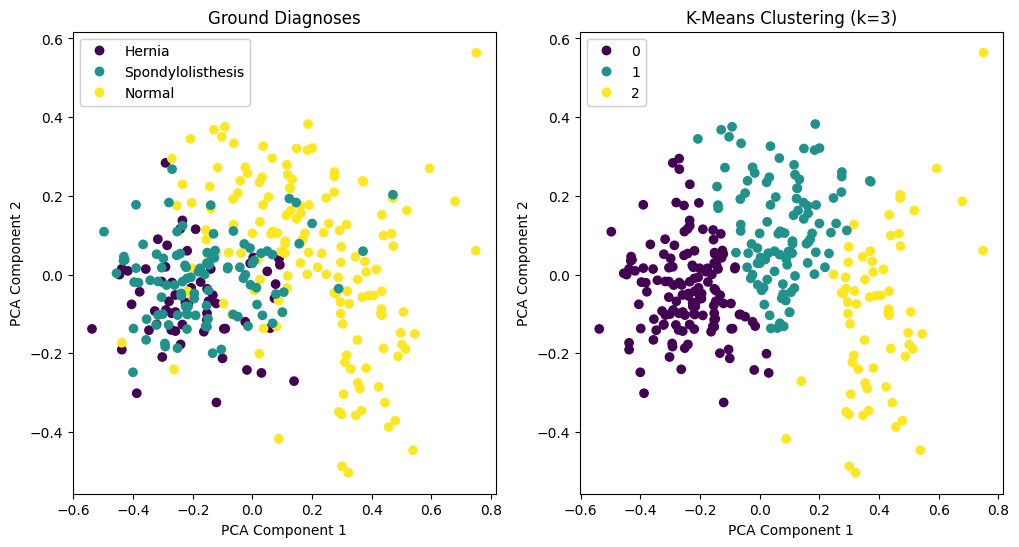

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(normalized_data)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(normalized_data)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis', c=true_labels_int)
plt.title("Ground Diagnoses")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
class_names = list(set(true_labels))
legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
plt.gca().add_artist(legend1)

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
cluster_names = list(set(kmeans_labels))
legend2 = plt.legend(handles=scatter.legend_elements()[0], labels=cluster_names)
plt.gca().add_artist(legend2)

plt.show()


## 4)
Considering the results from questions (1) and (3), identify two ways on how clustering can
be used to characterize the population of ill and healthy individuals.

- Clustering helps identify groups of individuals within a dataset based on their similarity, which can be use to characterize individuals as either healthy or ill. In the example of the graphs generated in question (3), we can observe that nearly all individuals in Cluster 2 have Spondylolisthesis.

- Clustering can also help identify anomalies however, we should also pay attention to the values of purity since they indicate how well data points in a cluster belong to the same class or category. In the case of high purity, we should be cautious about anomalies as they may suggest the need for further investigation into the health of those individuals.